<h1> Playing with Pandas DF</h1>

In [2]:
import pylab
import matplotlib as mpl
import pandas as pd
import scipy as scp
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from scipy.interpolate import UnivariateSpline
%pylab inline
pylab.rcParams['figure.figsize'] = (10.0, 8.0) # set size of figures"
plt.rcParams.update({'font.size': 18})

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


<h1> load in data </h1>

In [3]:
#Ani=pd.read_excel('/Users/attiladobi/Documents/Ani/sept_oct2013.xlsx',skiprows=0)
Ani=pd.read_excel('data/sept_oct2013.xlsx',skiprows=0)
Time=array(Ani['Time'].T,dtype='datetime64')
Ani['Hour']=pd.DatetimeIndex(Ani['Time']).hour #allows to sort by hours of the day
Ani['Day']=pd.DatetimeIndex(Ani['Time']).day #sort by hours of the day
Ani['Month']=pd.DatetimeIndex(Ani['Time']).month #sort by hours of the day

<h1> Much easier way to group by hour and take average </h1>

In [18]:
Ani_hourly=Ani.groupby('Hour').mean()
#That's it. Just group by hour... and display
Ani_hourly

,TS2,HS2,DS2,TSh6,HSh6,DSh6,TSh7,HSh7,DSh7,TS10,...,HSh42,DSh42,TK5,HK5,DK5,TK8,HK8,DK8,Day,Month
Hour,,,,,,,,,,,,,,,,,,,,,
0,9.507051,64.657692,3.099615,9.516667,63.911538,2.956154,9.660897,61.295513,2.493205,9.679167,...,59.739744,2.576154,8.525000,63.352083,1.875417,7.897222,64.080556,1.430556,25.357143,9.571429
1,8.625641,67.332692,2.824872,8.638462,66.707051,2.722564,8.650641,63.982692,2.147308,8.766667,...,62.853846,2.187949,7.737500,67.283333,1.955000,6.869444,66.730556,0.952222,25.357143,9.571429
2,7.824359,69.430128,2.495513,7.888462,68.701923,2.425256,7.883974,65.992949,1.852308,7.995238,...,65.124359,1.930128,7.172917,69.833333,1.926250,6.436111,70.072222,1.233333,25.357143,9.571429
3,6.879487,71.608333,2.022821,7.034615,70.430128,1.956154,7.030128,67.570513,1.368077,7.054167,...,66.799359,1.382179,6.187500,71.668750,1.308333,5.833333,70.794444,0.786111,25.357143,9.571429
4,6.221795,74.169872,1.886026,6.318590,72.755769,1.722179,6.335897,69.848718,1.174872,6.354762,...,68.704487,1.184103,5.618750,72.929167,0.966667,5.191667,71.736111,0.360000,25.357143,9.571429
5,6.000000,75.017337,1.825798,6.090153,73.920250,1.720666,6.056172,70.965326,1.118308,6.167093,...,70.785714,1.230374,5.897790,70.317680,0.671271,5.770000,69.240000,0.351333,25.357143,9.571429
6,5.395455,75.840152,1.395909,5.514394,74.348485,1.245606,5.481818,71.701515,0.708182,5.473611,...,71.831061,0.846364,5.825000,66.262500,-0.205000,5.791667,67.687500,0.105833,25.357143,9.571429
7,6.038636,74.566667,1.746515,6.202273,73.477273,1.711667,6.331818,70.529545,1.233030,5.544444,...,71.981818,1.175455,5.508333,65.841667,-0.584167,5.370833,67.975000,-0.198333,25.357143,9.571429
8,14.864394,55.434091,4.922576,11.419697,62.696970,4.191970,12.190909,59.728788,4.079848,11.526389,...,64.037879,3.981970,8.691667,61.266667,0.984167,8.395833,63.470833,1.403333,25.357143,9.571429


<h1> Once we have Ani_hourly, calculate Sun Back, Sun Front, Shade, Control </h1>

In [93]:
#take the mean, use the filter function to look for string "T.." in the column label
Ani_Shade = Ani_hourly.filter(regex="TSh").mean(axis=1)
Ani_Contr = Ani_hourly.filter(regex="TK").mean(axis=1)

#Trick to get all the Sun "S" and separate from shade "Sh"
a=Ani_hourly.filter(regex="TS").keys()
b=Ani_hourly.filter(regex="TSh").keys()
sun_keys= a[~a.isin(b)]
Ani_Sun=Ani_hourly[sun_keys].mean(axis=1)

#break up the Sun :p ... boom
Ani_SunBack=Ani_hourly[['TS2','TS10','TS19']].mean(axis=1)
Ani_SunFront=Ani_hourly[['TS27','TS27','TS32','TS34','TS37']].mean(axis=1)

<h3> if we want to do this for Humidity or Dew point then replace T with H or D </h3>

<h1> That's it, padas are magic. Now we plot </h1>

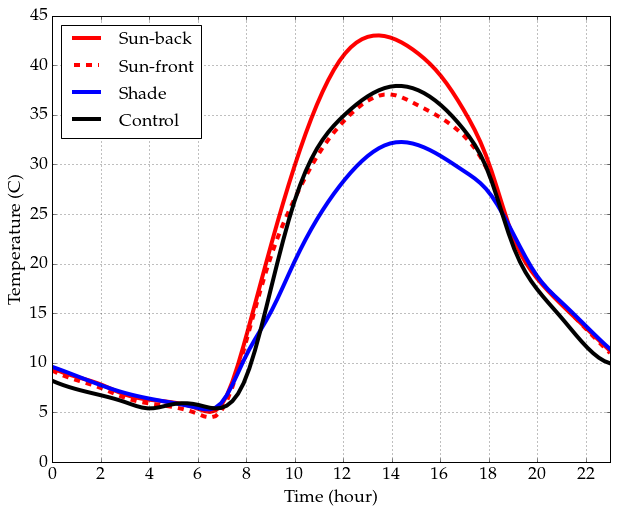

In [96]:
hours=np.arange(0,24) #x data for y values

#spline interpolation to the data
xhours=linspace(0,23,100)
SS_back= UnivariateSpline(hours,Ani_SunBack,s=0.1)
SS_front= UnivariateSpline(hours,Ani_SunFront,s=0.1)
SSh= UnivariateSpline(hours,Ani_Shade,s=0.1)
SC= UnivariateSpline(hours,Ani_Contr,s=0.1)

######### plot with spline interpolation #########
plot(xhours,SS_back(xhours),'-r',linewidth=4)
plot(xhours,SS_front(xhours),'--r',linewidth=4)
plot(xhours,SSh(xhours),'-b',linewidth=4)
plot(xhours,SC(xhours),'-k',linewidth=4)

######### plot without spine  #############
#plot(hours,Ani_SunBack,'-r',linewidth=4)
#plot(hours,Ani_SunFront,'--r',linewidth=4)
#plot(hours,Ani_Shade,'-b',linewidth=4)
#plot(hours,Ani_Contr,'-k',linewidth=4)

ylabel('Temperature (C)')
xlabel('Time (hour)')
legend(('Sun-back','Sun-front','Shade','Control'),loc='upper left',fontsize=18)
xticks(np.arange(0,23,2))
xlim(0,23)
grid()
plt.savefig('fig/temp_means.png')